# Perceptron demo

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def gen_data(m):
    """Generate m random data points from each of two diferent normal 
    distributions with unit variance, for a total of 2*m points.
    
    Parameters
    ----------
    m : int
        Number of points per class
        
    Returns
    -------
    x, y : numpy arrays
        x is a float array with shape (m, 2)
        y is a binary array with shape (m,)
    
    """
    sigma = np.eye(2)
    mu = np.array([[0, 2], [0, 0]])
    mvrandn = np.random.multivariate_normal
    x = np.concatenate([mvrandn(mu[:, 0], sigma, m), mvrandn(mu[:, 1], sigma, m)], axis=0)
    y = np.concatenate([np.zeros(m), np.ones(m)], axis=0)
    idx = np.arange(2 * m)
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]
    return x, y

In [4]:
def set_limits(axis, x):
    """Set the axis limits, based on the min and max of the points.
    
    Parameters
    ----------
    axis : matplotlib axis object
    x : array with shape (m, 2)
    
    """
    axis.set_xlim(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5)
    axis.set_ylim(x[:, 1].min() - 0.5, x[:, 1].max() + 0.5)

In [9]:
def init_plot(x, y, boundary, loops):
    """Initialize the plot with two subplots: one for the training
    error, and one for the decision boundary. Returns a function
    that can be called with new errors and boundary to update the
    plot.
    
    Parameters
    ----------
    x : numpy array with shape (m, 2)
        The input data points
    y : numpy array with shape (m,)
        The true labels of the data
    boundary : numpy array with shape (2, 2)
        Essentially, [[xmin, ymin], [xmax, ymax]]
        
    Returns
    -------
    update_plot : function
        This function takes two arguments, the array of errors and
        the boundary, and updates the error plot with the new errors
        and the boundary on the data plot.
    
    """
    plt.close('all')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    error_line, = ax1.plot([0], [0], 'k-')
    ax1.set_xlim(0, (loops * y.size) - 1)
    ax1.set_ylim(0, 15)
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Training error")
    
    colors = np.empty((y.size, 3))
    colors[y == 0] = [0, 0, 1]
    colors[y == 1] = [1, 0, 0]
    ax2.scatter(x[:, 0], x[:, 1], c=colors, s=25)
    normal_line, = ax2.plot(boundary[0, 0], boundary[0, 1], 'k-', linewidth=1.5)

    set_limits(ax2, x)
    fig.canvas.draw()
    
    def update_plot(errors, boundary):
        error_line.set_xdata(np.arange(errors.size))
        error_line.set_ydata(errors)
        normal_line.set_xdata(boundary[:, 0])
        normal_line.set_ydata(boundary[:, 1])
        set_limits(ax2, x)
        fig.canvas.draw()
        
    return update_plot

In [10]:
def calc_normal(normal, weights):
    """Calculate the normal vector and decision boundary.
    
    Parameters
    ----------
    normal : numpy array with shape (2,)
        The normal vector to the decision boundary
    weights : numpy array with shape (3,)
        Weights of the perceptron
        
    Returns
    -------
    new_normal, boundary : numpy arrays
        The new_normal array is the updated normal vector. The
        boundary array is [[xmin, ymin], [xmax, ymax]] of the
        boundary between the points.
    
    """
    new_normal = normal - (np.dot(weights[:2], normal) / np.dot(weights[:2], weights[:2])) * weights[:2]
    new_normal = new_normal / np.dot(new_normal, new_normal)
    offset = -weights[2] * weights[:2] / np.dot(weights[:2], weights[:2])
    normmult = np.array([-1000, 1000])
    boundary = (new_normal[None] * normmult[:, None]) + offset[None]
    return new_normal, boundary

In [11]:
def demo(m=20, alpha=0.5, loops=10):
    """Run a demo of training a perceptron.
    
    Parameters
    ----------
    m : int
        Number of datapoints per class
    alpha : float
        Initial learning rate
    loops : int
        Number of times to go through the data
        
    """
    # generate some random data
    x, y = gen_data(m)
        
    # initialize helper variables
    X = np.concatenate([x, np.ones((2 * m, 1))], axis=1)
    errors = np.empty(loops * y.size)

    # set up our initial weights and normal vectors
    w = np.array([0, 0.2, 0])
    normal, boundary = calc_normal(np.random.randn(2), w)

    # initialize the plot
    update_plot = init_plot(x, y, boundary, loops)

    for i in range(loops):
        # update the learning rate
        alpha = alpha * 0.5

        for j in range(y.size):
            # number of iterations so far
            k = i * y.size + j
            
            # compute the output of the perceptron and the error to the true labels
            output = sigmoid(np.dot(w, X.T))
            errors[k] = ((y - output) ** 2).sum()
            
            # update our weights and recalculate the normal vector
            w += alpha * (y[j] - output[j]) * output[j] * (1 - output[j]) * X[j]
            normal, boundary = calc_normal(normal, w)

            # update the plot
            update_plot(errors[:k], boundary)

<IPython.core.display.Javascript object>


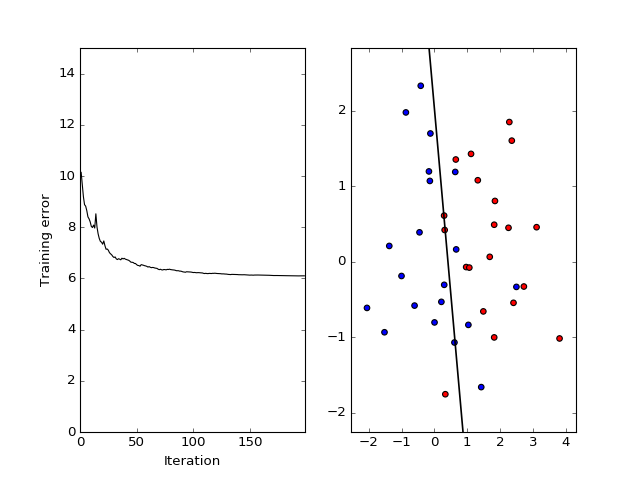

In [12]:
demo(loops=5)